<a href="https://colab.research.google.com/github/den00333/ExpenseApp/blob/master/malware2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

malData = pd.read_csv('/content/drive/MyDrive/MalwareData.csv', sep='|')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
malData['legitimate'].value_counts()

legitimate
0    96724
1    41323
Name: count, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
noLegitimateData = malData.drop(['legitimate'], axis=1)

In [ ]:
noLegitimateData = malData

In [ ]:
normal = noLegitimateData[0:41323]
malware = noLegitimateData[41323::]

In [ ]:
malware.head(10)

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
41323,VirusShare_4a400b747afe6547e09ce0b02dae7f1c,4a400b747afe6547e09ce0b02dae7f1c,332,224,258,11,0,354816,257024,0,183632,4096,360448,4194304.0,4096,512,5,1,0,0,5,1,626688,1024,0,2,33088,1048576,4096,1048576,4096,0,16,5,4.590397,2.378947,6.296826,120524.800000,7680,354816,122148.600000,16468,354799,7,138,0,0,7,3.914415,1.441688,7.677091,7298.428571,16,28438,72,0,0
41324,VirusShare_9bd57c8252948bd2fa651ad372bd4f13,9bd57c8252948bd2fa651ad372bd4f13,332,224,271,6,0,24064,164864,1024,12538,4096,28672,4194304.0,4096,512,4,0,6,0,4,0,241664,1024,0,2,32768,1048576,4096,1048576,4096,0,16,5,4.104541,0.000000,6.440106,6758.400000,0,24064,46260.800000,3144,154712,8,155,1,0,6,3.199107,1.971335,5.214816,452.000000,34,958,0,15,0
41325,VirusShare_d1456165e9358b8f61f93a5f2042f39c,d1456165e9358b8f61f93a5f2042f39c,332,224,258,10,0,118784,381952,0,59914,4096,122880,4194304.0,4096,512,5,1,0,0,5,1,520192,1024,558287,2,33088,1048576,4096,1048576,4096,0,16,5,5.662408,4.183692,7.961871,100147.200000,9216,334848,101559.800000,9368,334440,7,114,0,0,18,6.530946,2.458492,7.992688,18523.444444,48,33945,72,14,0
41326,VirusShare_e4214cc73afbba0f52bb72d5db8f8bb1,e4214cc73afbba0f52bb72d5db8f8bb1,332,224,258,10,0,174592,300032,0,117140,4096,180224,4194304.0,4096,512,5,1,0,0,5,1,487424,1024,513173,2,33088,1048576,4096,1048576,4096,0,16,5,5.735470,4.758260,7.364313,93081.600000,15360,192000,94698.800000,21500,191664,11,254,15,0,15,5.732393,2.852364,7.987726,12706.133333,118,60500,72,14,0
41327,VirusShare_710890c07b3f93b90635f8bff6c34605,710890c07b3f93b90635f8bff6c34605,332,224,258,9,0,475648,348672,0,319769,4096,483328,4194304.0,4096,512,5,0,0,0,5,0,856064,1024,1820725856,2,33088,1048576,4096,1048576,4096,0,16,5,5.139934,4.480790,6.558149,164864.000000,13824,475648,168145.200000,30840,475580,14,421,15,0,59,2.827826,0.960953,7.212329,2637.033898,20,67624,72,0,0
41328,VirusShare_3c2eb01508703752dca01957ea451a40,3c2eb01508703752dca01957ea451a40,332,224,259,9,0,157696,62464,0,67015,4096,163840,4194304.0,4096,512,5,0,0,0,5,0,233472,1024,272988,2,33024,1048576,4096,1048576,4096,0,16,4,4.819885,2.977365,6.485124,55040.000000,3584,157696,55626.750000,6700,157297,2,76,0,0,13,3.943296,1.814443,6.122045,2708.153846,132,9640,72,14,0
41329,VirusShare_3fb2d0ac00c5dff6c4fd5dfe6ba52c3f,3fb2d0ac00c5dff6c4fd5dfe6ba52c3f,332,224,259,83,82,724992,2306048,0,4243456,3522560,4308992,4194304.0,4096,4096,5,0,0,0,5,0,6709248,4096,3077047,2,32768,1048576,4096,1048576,4096,0,16,9,3.783125,0.000000,7.999518,336782.222222,0,1884160,744182.333333,2272,3061299,4,243,0,0,21,3.987463,2.642159,6.473700,14288.000000,76,270376,0,0,0
41330,VirusShare_ad1ca9a4d572c0a2793c4cea29b20887,ad1ca9a4d572c0a2793c4cea29b20887,332,224,258,10,0,120320,385024,0,61578,4096,126976,4194304.0,4096,512,5,1,0,0,5,1,528384,1024,566330,2,33088,1048576,4096,1048576,4096,0,16,5,5.646444,4.117264,7.962776,101068.800000,9728,330752,102623.800000,9404,339652,3,89,0,0,6,3.729824,2.458492,5.317552,2739.500000,48,9640,72,15,0
41331,VirusShare_7414edb3d0be66aa0816e6ed4b6b0a21,7414edb3d0b

**FIX THE IMBALANCE DATA THROUGH SMOTE**

In [ ]:
X_data = malData.drop(['Name', 'md5', 'legitimate'], axis=1).values
y_label = malData['legitimate'].values

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_data, y_label)

In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

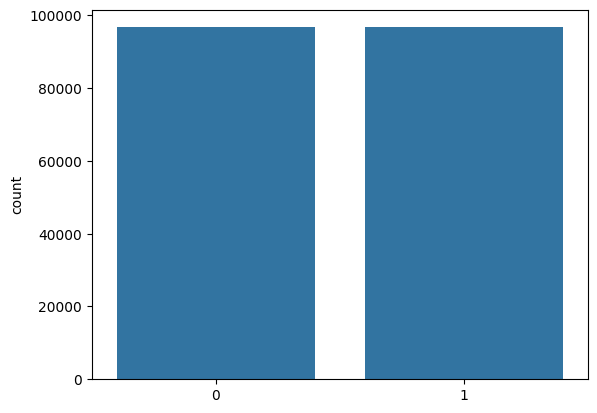

In [ ]:
sns.countplot(x=y_resampled)

**END OF CODE FOR BALANCING THE DATA (SMOTE)**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [ ]:
# input_data = malData.drop(['Name', 'md5', 'legitimate'], axis=1).values
# label = malData['legitimate'].values

In [ ]:
extraTrees = ExtraTreesClassifier().fit(X_data, y_label)
selected = SelectFromModel(extraTrees, prefit=True)
newInput_data = selected.transform(X_data)
print(X_data.shape, newInput_data.shape)

(138047, 54) (138047, 13)


In [ ]:
import numpy as np
features = newInput_data.shape[1]
importances = extraTrees.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
print(indices)

[24  0  2 53 34 23 18 11 47 48  1 14 33 32 50 31 15 22 25  4 19 46 13 41
 52 16  3 42 21 39 12  8 17 43 36 45 44 27 40  5 26 20 35 38 51 49 10 37
  6  9  7 28 30 29]


In [ ]:
for f in range(features):
  print("%d"%(f+1), malData.columns[2+indices[f]], importances[indices[f]])

1 DllCharacteristics 0.15402726564939265
2 Machine 0.12128189815572422
3 Characteristics 0.08247444318826395
4 VersionInformationSize 0.0700053063470577
5 SectionsMaxEntropy 0.06405233423691523
6 Subsystem 0.05342989030975582
7 MajorSubsystemVersion 0.053269450809353115
8 ImageBase 0.053133569630571226
9 ResourcesMinEntropy 0.04653609073817616
10 ResourcesMaxEntropy 0.04309254476319295
11 SizeOfOptionalHeader 0.030930154000071586
12 MajorOperatingSystemVersion 0.022084303226596807
13 SectionsMinEntropy 0.019202289774655643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newInput_data, y_label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classif = RandomForestClassifier(n_estimators=50)
classif.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = classif.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

Accuracy: 99.45%
Recall: 99.45%
Precision: 99.45%
F1-Score: 99.45%


In [ ]:
columns_need = ['DllCharacteristics','Characteristics','Machine','SectionsMaxEntropy','ResourcesMaxEntropy','Subsystem','VersionInformationSize','ImageBase','MajorSubsystemVersion','SizeOfOptionalHeader','SectionsMinEntropy','ResourcesMinEntropy']

In [ ]:
sample_input = malData.iloc[41323][columns_need]

In [ ]:
sample_input_values = sample_input.values
sample_input_values
siv = [[33088, 258, 332, 6.29682587021, 7.67709054366, 2, 0, 4194304.0, 5,
       224, 2.37894684003, 1.44168828354]]

In [ ]:
siv_outside = [[33120, 34404, 34, 5368709120, 0, 7.826605,  2, 6, 7.892101, 2.389643,112, 6, 0.0]]

In [ ]:
pred = classif.predict(siv_outside)

In [ ]:
pred

array([1])

In [ ]:
/content/malwareDetectionJ

**DEPLOYING THE MODEL THROUGH PICKLE**

In [ ]:
import pickle

In [ ]:
pickle.dump(classif, open('/content/malwareDetection', 'wb'))

In [ ]:
model_saved = pickle.load(open('/content/malwareDetection', 'rb'))

In [ ]:
input_test = [33120, 34404, 34, 5368709120, 0, 7.826605,  2, 6, 7.892101, 2.389643,112, 6, 0.0]

In [ ]:
test_outcome = model_saved.predict(input_test)

In [ ]:
test_outcome

array([1])

In [ ]:
import joblib

In [ ]:
joblib.dump(classif, 'malwareDetection_SMOTED.joblib')

['malwareDetection_SMOTED.joblib']

In [ ]:
model_saved2 = joblib.load('/content/malwareDetectionTAMANATO.joblib')

In [ ]:
test_outcome2 = model_saved2.predict([input_test])

In [ ]:
test_outcome2

array([1])